# Import Some Important Libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Importing the Data

In [2]:
df = pd.read_csv('D:/Spam_detection/SPAM.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# What about Class Distribution ?

<AxesSubplot:>

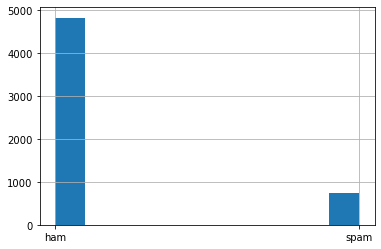

In [27]:
df['Category'].hist()

**The data is obviously IMBALANCED**<br>
Remember this! It is an important factor to determine the best classifier!

# Let's see a word cloud for spam and real messages
Also, remember this! it is an important factor to determine the **Feature Extraction** method

Featured words in spam messeges:


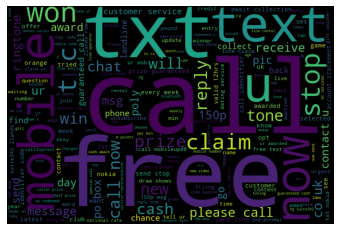

Featured words in non-spam messeges:


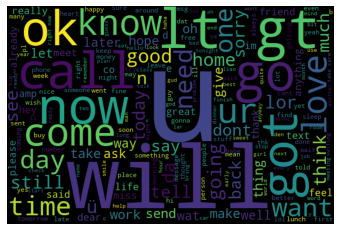

In [3]:
def visualize(label):
  words=''
  for msg in df[df['Category'] == label]['Message']:
    msg = msg.lower()
    words+=msg + ''
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

print("Featured words in spam messeges:")
visualize('spam')

print("Featured words in non-spam messeges:")
visualize('ham')

# Let's Encode our labels (1 for spam / 0 for real)

In [4]:
df['b_labels'] = df['Category'].map({'ham':0, 'spam':1})
df

,Category,Message,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


# Create the labels array

In [5]:
Y = df['b_labels'].to_numpy()
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

**It is obvious from the word cloud that the word count plays a significant role in spam detecting.<br>
That is why we will use Count Vectorization (BOW) as a Feature Extraction method.**

In [28]:
cv = CountVectorizer(decode_error='ignore')
X = cv.fit_transform(df['Message'])
X.shape

(5572, 8709)

# Train/ Test Splitting

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.22, random_state = 42, stratify = Y)

# 1: Support Vector Machine

In [30]:
clf = svm.SVC(kernel='linear')
clf.fit(xtrain,ytrain)
SVMpred = clf.predict(xtest)
print('Confusion Matrix')
print(confusion_matrix(ytest, SVMpred))
print('Classification Report')
print(classification_report(ytest, SVMpred))

Confusion Matrix
[[1062    0]
 [  23  141]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1062
           1       1.00      0.86      0.92       164

    accuracy                           0.98      1226
   macro avg       0.99      0.93      0.96      1226
weighted avg       0.98      0.98      0.98      1226



# 2: Decision Tree Classifier

In [31]:
DTC = DecisionTreeClassifier()
DTC = DTC.fit(xtrain,ytrain)
DTCPred = DTC.predict(xtest)
print('Confusion Matrix')
print(confusion_matrix(ytest, DTCPred))
print('Classification Report')
print(classification_report(ytest, DTCPred))

Confusion Matrix
[[1047   15]
 [  27  137]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1062
           1       0.90      0.84      0.87       164

    accuracy                           0.97      1226
   macro avg       0.94      0.91      0.92      1226
weighted avg       0.97      0.97      0.97      1226



# 3: K-Nearest Neighbors

In [32]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(xtrain,ytrain)
KNNPred= KNN.predict(xtest)
print('Confusion Matrix')
print(confusion_matrix(ytest, KNNPred))
print('Classification Report')
print(classification_report(ytest, KNNPred))

Confusion Matrix
[[1062    0]
 [  82   82]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1062
           1       1.00      0.50      0.67       164

    accuracy                           0.93      1226
   macro avg       0.96      0.75      0.81      1226
weighted avg       0.94      0.93      0.92      1226



# 4: Random Forest

In [33]:
RF=RandomForestClassifier(n_estimators=100) #default number of trees in the forest model 
RF.fit(xtrain,ytrain)
RFPred=RF.predict(xtest)
print('Confusion Matrix')
print(confusion_matrix(ytest, RFPred))
print('Classification Report')
print(classification_report(ytest, RFPred))

Confusion Matrix
[[1062    0]
 [  36  128]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1062
           1       1.00      0.78      0.88       164

    accuracy                           0.97      1226
   macro avg       0.98      0.89      0.93      1226
weighted avg       0.97      0.97      0.97      1226



# 5: Multinomial Naive Bayes

In [34]:
model = MultinomialNB()
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
print('Confusion Matrix')
print(confusion_matrix(ytest, pred))
print('Classification Report')
print(classification_report(ytest, pred))

Confusion Matrix
[[1051   11]
 [  12  152]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1062
           1       0.93      0.93      0.93       164

    accuracy                           0.98      1226
   macro avg       0.96      0.96      0.96      1226
weighted avg       0.98      0.98      0.98      1226



# How to determine the best classifier?
**Simply, by Plotting the ROC and compute AUC for each one!**

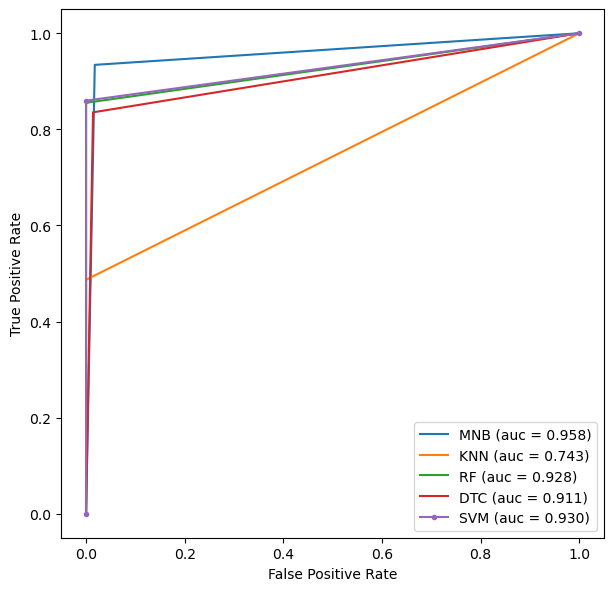

In [35]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(7, 7), dpi=100)
svm_fpr, svm_tpr, threshold = roc_curve(ytest, SVMpred)
auc_svm = auc(svm_fpr, svm_tpr)


dt_fpr, dt_tpr, threshold = roc_curve(ytest, DTCPred)
auc_dt = auc(dt_fpr, dt_tpr)

plt.plot(mnb_fpr, mnb_tpr, linestyle='-', label='MNB (auc = %0.3f)' % auc_mnb)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_knn)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RF (auc = %0.3f)' % auc_rf)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DTC (auc = %0.3f)' % auc_dt)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# What can we conclude?
**The Largest AUC is given by the MNB followed by the SVM**<br><br>
Since the data is **imbalanced**, we are interested in a higher recall for the spam class<br>
MNB Recall: 93%<br>
SVM Recall: 86%<br>

**Indeed, The Multi-Nomial Naive Bayes is our best choice for this problem**

# 

# That's it! 
**Share if you find this helpful!**

Regards,<br>
Ibrahim M. Nasser